In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import os
import warnings

import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionPipeline
from dotenv import load_dotenv
from tqdm.notebook import tqdm

In [ ]:
%%time
project_path = os.path.join(os.getcwd(), os.pardir)
load_dotenv(os.path.join(project_path, '.env'))

pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    use_auth_token=os.environ["DIFFUSERS_ACCESS_TOKEN"],
    # revision="fp16", 
    # torch_dtype=torch.float16,
)
pipe.to('cuda')
def null_safety(images, **kwargs):
      return images, False
pipe.safety_checker = null_safety
print("Done")

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
# prompt = "The streets of old cairo at the time of the pharaohs, intricate, elegant, volumetric lighting, digital painting, highly detailed, artstation, sharp focus, illustration, concept art, ruan jia, steve mccurry"
prompt = "beautiful art nude teen"
generator = torch.Generator("cuda").manual_seed(1024)
image = pipe(prompt, guidance_scale=7.5, num_inference_steps=100, generator=generator)["sample"][0]
image

  0%|          | 0/51 [00:00<?, ?it/s]

In [5]:
torch.version.cuda

'11.6'

In [6]:
torch.__version__

'1.12.1+cu116'

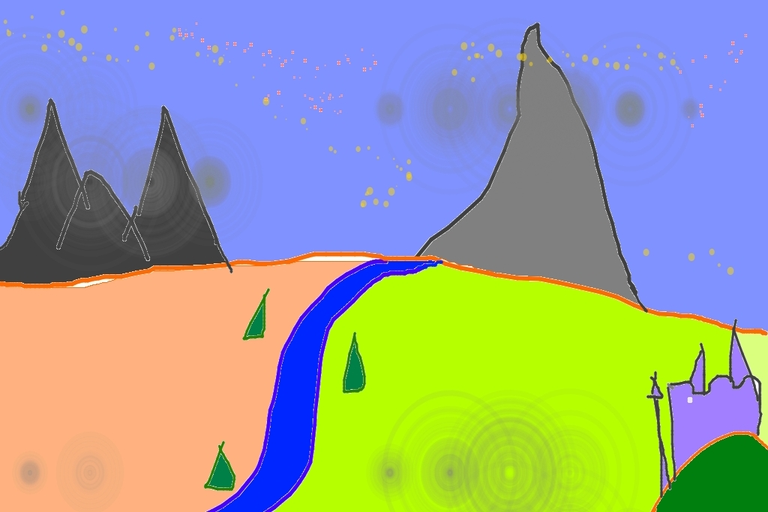

In [14]:
# let's download an initial image
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))
init_image

In [31]:
init_image = Image.open("Новый документ 2018-08-27.jpg")
# init_image

  0%|          | 0/51 [00:00<?, ?it/s]

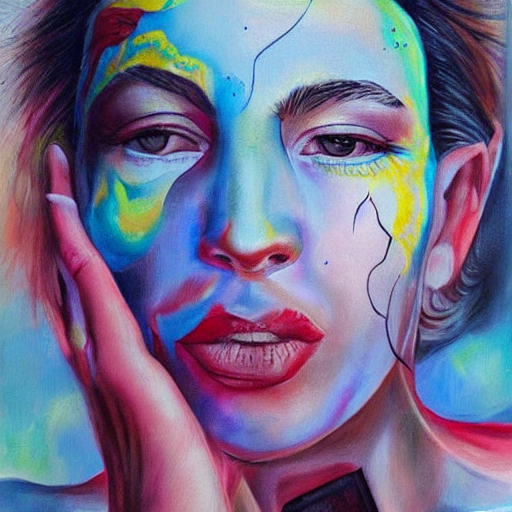

In [60]:
# let's download an initial image
# prompt = "A fantasy landscape, trending on artstation"
prompt = "Face realistic dream painting"

image = pipe(prompt=prompt, init_image=init_image, strength=0.75, guidance_scale=7).images[0]
image
# images[0].save("fantasy_landscape.png")

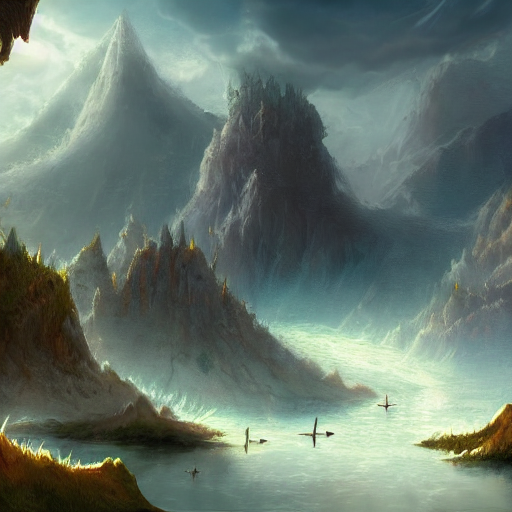

In [24]:
images